In [ ]:
# default_exp shap_evals

In [ ]:
#export
import shap
from tensorflow.keras.models import load_model
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import average_precision_score,precision_recall_curve
#funcsigs replaces the (deprecated?) sklearn signature
from funcsigs import signature
#from sklearn.utils.fixes import signature
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
# filepath changed from: 'alex-adapted-res-003/best_model.hdf5' for testing
path = '../../08_test/best_model.hdf5'
# You must be using tensorflow 2.3 or greater
model = load_model(path) #<----- The Model

In [ ]:
corpora_test_x = np.load('../../08_test/corpora_test_x.npy')
target_test_y = np.load('../../08_test/target_test_y.npy')

In [ ]:
#export
def evaluate_model(criticality_network_load,corpora_test_x,target_test_y):
    score = criticality_network_load.evaluate(corpora_test_x, target_test_y, verbose=1)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    history_predict = criticality_network_load.predict(x=corpora_test_x)
    history_predict
    
    inferred_data = pd.DataFrame(history_predict,columns=list('AB'))
    target_data = pd.DataFrame(target_test_y,columns=list('LN'))
    data = target_data.join(inferred_data)
    
    y_true = list(data['L'])
    y_score= list(data['A'])
    average_precision = average_precision_score(y_true, y_score)
    
    print('Average precision-recall score: {0:0.2f}'.format(average_precision))
    
    #ROC Curve (all our samples are balanced)
    auc = roc_auc_score(y_true, y_score)
    print('AUC: %.3f' % auc)

In [ ]:
evaluate_model(model,corpora_test_x,target_test_y)

361/361 [==============================] - 3s 8ms/step - loss: 0.3210 - accuracy: 0.9616
Test loss: 0.3209781050682068
Test accuracy: 0.9616250991821289
Average precision-recall score: 0.99
AUC: 0.988


In [ ]:
# select a set of background examples to take an expectation over
background = corpora_test_x[np.random.choice(corpora_test_x.shape[0], 400, replace=False)]

# explain predictions of the model on four images
e = shap.DeepExplainer(model, background)
# ...or pass tensors directly
# e = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)
shap_values = e.shap_values(corpora_test_x[0:200])


In [ ]:
def clean_list(inp):
    out = []
    for i in inp:
        out.append(i[0])
    return out

def clean_input(inp):
    return tuple(clean_list(inp.tolist()))


In [ ]:
def summarize(inp):
    total = 0
    for i in inp:
        # print(i)
        total+=i
    new = [total]
    return new

In [ ]:
z = clean_input(corpora_test_x[0, 1])
reverse_embeddings[z]

'vector'

In [ ]:
len(shap_values[0])

200

In [ ]:
summarize(clean_list(shap_values[0][0, 1]))

[0.0026763668144553776]

In [ ]:
clean_list(shap_values[0][0, 1])

[1.2271080777281895e-05,
 4.720741344499402e-05,
 -4.995658400730463e-06,
 2.584553112683352e-05,
 4.300484579289332e-05,
 6.073251279303804e-05,
 6.338166713248938e-05,
 -5.379553840612061e-05,
 1.7151884094346315e-05,
 -3.26316112477798e-05,
 4.637196252588183e-05,
 -1.9520517525961623e-05,
 -1.1204999282199424e-05,
 -6.894117632327834e-06,
 -1.2935940958413994e-06,
 0.0006656816694885492,
 2.1822344933752902e-05,
 4.3171462493774015e-06,
 5.226886787568219e-05,
 9.1770758444909e-05,
 1.7759422235030797e-06,
 6.8179429035808425e-06,
 -7.279254987224704e-06,
 4.271682701073587e-05,
 1.4224900041881483e-05,
 3.6072411603527144e-05,
 1.2470863111957442e-05,
 -5.8172274293610826e-05,
 -4.775761044584215e-05,
 4.5828033762518317e-05,
 -3.006854240084067e-05,
 2.6807478207047097e-05,
 1.10960281745065e-05,
 9.879457502393052e-05,
 3.446335904300213e-05,
 0.00011316267773509026,
 4.741596058011055e-06,
 6.660996587015688e-05,
 -5.274967770674266e-05,
 -0.00012765792780555785,
 9.68722997640

In [ ]:
e.expected_value[0].numpy()

0.51512355

In [ ]:
from utils.vectorize_sentence import Embeddings
embeddings = Embeddings()
embed_path = '../data/word_embeddings-embed_size_100-epochs_100.csv'
embeddings_dict = embeddings.get_embeddings_dict(embed_path)

In [ ]:
reverse_embeddings = {}
for key, value in embeddings_dict.items():
    value = tuple(np.array(value, dtype='float32').tolist())
    # print(value)
    reverse_embeddings[value] = key

In [ ]:
shap_values[0][0].shape

(618, 100, 1)

In [ ]:
# map shap values to strings
# (shap, string)
shaps = []

# TEMPORARY CLEAN DUPLICATES
#vectorSet = set()
for doc in range(shap_values[0].shape[0]):
    for word in range(shap_values[0][doc].shape[0]):
        # grab the word
        try:
            string = reverse_embeddings[clean_input(corpora_test_x[doc, word])]
            #if(string in vectorSet):
                #raise KeyError
            #vectorSet.add(string)
            shap_value = summarize(clean_list(shap_values[0][doc, word]))[0]
            shaps.append((shap_value, string))
        except KeyError as e:
            pass
        

In [ ]:
shaps.sort()

In [ ]:
shaps = sorted(shaps, key = lambda x: abs(x[0]), reverse=True)

In [ ]:
shaps

[(0.7642678649863228, 'vulner'),
 (0.4446263783008817, 'vulner'),
 (0.38018728298629867, 'vulner'),
 (0.2637992160639442, 'vulner'),
 (0.24834817654823382, 'attack'),
 (0.24500687751969963, 'vulner'),
 (0.24326636254954792, 'vulner'),
 (0.2375788800495684, 'vulner'),
 (0.23702446467996197, 'vulner'),
 (0.23680808492554206, 'vulner'),
 (0.2352849537965085, 'vulner'),
 (0.23433708803167974, 'secur'),
 (0.231681770045725, 'vulner'),
 (0.23062588295726982, 'vulner'),
 (0.2297401471730609, 'vulner'),
 (0.2228669423403744, 'vulner'),
 (0.21939452135211468, 'attack'),
 (0.21503759231336517, 'vulner'),
 (0.21369886844240682, 'attack'),
 (0.21030841520132526, 'vulner'),
 (0.20842730572348955, 'attack'),
 (0.20815151672923093, 'attack'),
 (0.20788801309481642, 'attack'),
 (0.2075441559597948, 'attack'),
 (0.2069531383258436, 'attack'),
 (0.20620559225153556, 'vulner'),
 (0.19695957110252493, 'attack'),
 (0.19549433293104812, 'attack'),
 (0.19351278130307037, 'attack'),
 (0.19208136371344153, 'at

In [ ]:
token

['vulner',
 'vulner',
 'vulner',
 'vulner',
 'vulner',
 'vulner',
 'vulner',
 'vulner',
 'vulner',
 'vulner',
 'vulner',
 'vulner',
 'vulner',
 'vulner',
 'vulner',
 'vulner',
 'vulner',
 'vulner',
 'vulner',
 'vulner',
 'vulner',
 'vulner',
 'vulner',
 'vulner',
 'vulner',
 'vulner',
 'vulner',
 'vulner',
 'vulner',
 'vulner',
 'vulner',
 'vulner',
 'vulner',
 'vulner',
 'vulner',
 'vulner',
 'vulner',
 'vulner',
 'vulner',
 'vulner',
 'vulner',
 'vulner',
 'vulner',
 'vulner',
 'vulner',
 'vulner',
 'vulner',
 'vulner',
 'vulner',
 'vulner',
 'vulner',
 'vulner',
 'vulner',
 'vulner',
 'vulner',
 'vulner',
 'vulner',
 'vulner',
 'vulner',
 'vulner',
 'vulner',
 'vulner',
 'vulner',
 'vulner',
 'vulner',
 'vulner',
 'vulner',
 'vulner',
 'vulner',
 'attack',
 'attack',
 'attack',
 'attack',
 'attack',
 'attack',
 'attack',
 'attack',
 'attack',
 'attack',
 'attack',
 'attack',
 'attack',
 'attack',
 'attack',
 'attack',
 'attack',
 'attack',
 'attack',
 'attack',
 'attack',
 'attack',

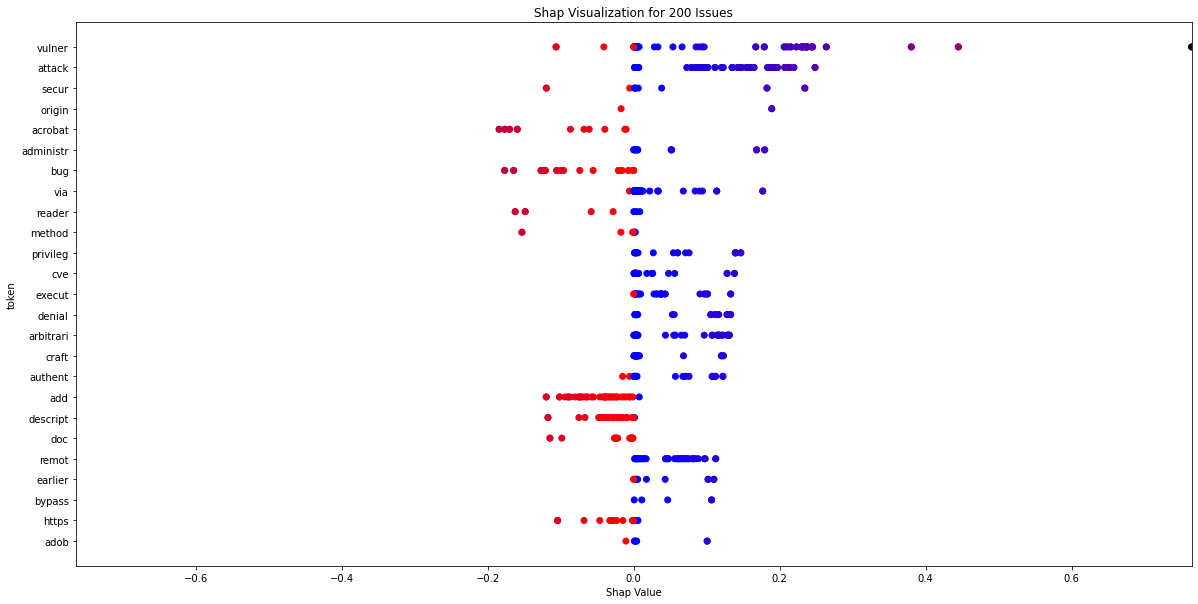

In [ ]:
import matplotlib.pyplot as plt
import math
shap_vals = [] 
token = []

data = {}

# Top 25 shap vals
uBound = 25
i = 0
while i < uBound:
    if(i < len(shaps)):
        curTok = shaps[i][1]
        curShap = shaps[i][0]
        if curTok in data.keys():
            data[curTok].append(curShap)
            uBound += 1
        else:
            data[curTok] = [curShap]
    i += 1

# get the rest
for i in range(len(shaps)):
    curTok = shaps[i][1]
    curShap = shaps[i][0]
    if curTok in data.keys():
        data[curTok].append(curShap)
            
#for thing in shaps:
    #shap_vals.append(thing[0])
    #token.append(thing[1])

for key in data.keys():
    for item in data[key]:
        shap_vals.append(item)
        token.append(key)
    
fig = plt.figure(figsize = (20, 10)) 

max_shap_val = max(shap_vals)

# creating the bar plot 
plt.scatter(shap_vals, token, c = [((x/max_shap_val) % 1, 0, (1-(x/max_shap_val)) % 1) for x in shap_vals], marker='o') 
  
plt.xlabel("Shap Value") 
plt.ylabel("token") 
plt.title("Shap Visualization for 200 Issues") 
plt.xlim([-1 * max_shap_val, max_shap_val])
plt.gca().invert_yaxis()
plt.show() 

In [ ]:
data

{'vulner': [0.7642678649863228,
  0.4446263783008817,
  0.38018728298629867,
  0.2637992160639442,
  0.24500687751969963,
  0.24326636254954792,
  0.2375788800495684,
  0.23702446467996197,
  0.23680808492554206,
  0.2352849537965085,
  0.231681770045725,
  0.23062588295726982,
  0.2297401471730609,
  0.2228669423403744,
  0.21503759231336517,
  0.21030841520132526,
  0.7642678649863228,
  0.4446263783008817,
  0.38018728298629867,
  0.2637992160639442,
  0.24500687751969963,
  0.24326636254954792,
  0.2375788800495684,
  0.23702446467996197,
  0.23680808492554206,
  0.2352849537965085,
  0.231681770045725,
  0.23062588295726982,
  0.2297401471730609,
  0.2228669423403744,
  0.21503759231336517,
  0.21030841520132526,
  0.20620559225153556,
  0.1788675527857322,
  0.1672333670403532,
  -0.10632045128295431,
  0.0965247758285841,
  0.09412342428095144,
  0.09002824501408213,
  0.08539080386890419,
  0.06627194875736109,
  0.05375948966866417,
  -0.040844408856173686,
  0.033151328669191

In [ ]:
max_shap_val

0.2057587202416471

TypeError: __array_prepare__ must return an ndarray or subclass thereof which is otherwise identical to its input

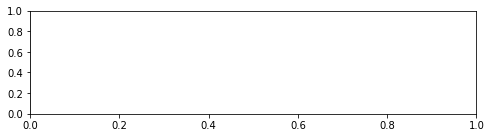

In [ ]:
sdf = np.matrix(np.stack(np.array([x for x in shap_vals])))
sdf
shap.summary_plot(np.matrix(np.stack(np.array([x for x in shap_vals]))), token)

In [ ]:
sdf.shape

(1, 56)

In [ ]:
shap

[3.2006903438741574e-06,
 3.180039801264911e-05,
 3.99604339733628e-05,
 5.988750906293916e-05,
 7.257166090113287e-05,
 -0.00011760739968735834,
 -0.00015784646532779334,
 -0.00017826433247591922,
 0.00019672459052344493,
 -0.000246953632313307,
 0.00026450171162650804,
 0.0002837872500691674,
 0.00032561755794091596,
 0.000353873653313741,
 0.0004237542798009031,
 -0.0004944261162052044,
 -0.0005323352790327363,
 0.0006772460629491661,
 0.0008324712503338105,
 0.0008850172236076759,
 0.0009233083882094206,
 -0.0010852375613126242,
 0.0012176110090820202,
 0.0013607781975224498,
 0.0014211115540092578,
 0.0014276196106948191,
 0.0014544346747413783,
 0.0015424723887802472,
 0.0015534514563739776,
 0.0015819657648066254,
 0.0016280074142684953,
 0.0017822913141571917,
 -0.0020287034742523247,
 0.0021418910959027926,
 0.002206635793129408,
 0.0022423731883307596,
 0.002269598327472977,
 0.0025128483171954485,
 0.002553282187818695,
 0.002591129320194341,
 0.002619092435679704,
 0.002645

In [ ]:
token.reverse()

In [ ]:
token

['attack',
 'vulner',
 'allow',
 'exploit',
 'unauthent',
 'easili',
 'affect',
 'access',
 'peopl',
 'data',
 'access',
 'base',
 'tool',
 'peopl',
 'peopl',
 'result',
 'vector',
 'enterpris',
 'tool',
 'read',
 'cvss',
 'oracl',
 'vulner',
 'compon',
 'soft',
 'via',
 'attack',
 'access',
 'confidenti',
 'soft',
 'subset',
 'cvss',
 'peopl',
 'network',
 'peopl',
 'cvss',
 'impact',
 'success',
 'score',
 'vulner',
 'peopl',
 'tool',
 'unauthor',
 'soft',
 'enterpris',
 'enterpris',
 'http',
 'compromis',
 'product',
 'support',
 'peopl',
 'version',
 'soft',
 'integr',
 'subcompon',
 'broker']

In [ ]:
e.expected_value[0]

NameError: name 'e' is not defined

In [ ]:
shaps

[(-0.005004257405630597, 'peopl'),
 (-0.002826338537488482, 'compon'),
 (-0.0023167781193365045, 'http'),
 (-0.001067999417934118, 'vulner'),
 (-0.0006993870434541805, 'peopl'),
 (-3.9695434992381706e-05, 'integr'),
 (0.0001419946506047154, 'version'),
 (0.00019393554845947847, 'enterpris'),
 (0.0002743236938194116, 'soft'),
 (0.00032578278130301896, 'subcompon'),
 (0.0004950492521800243, 'peopl'),
 (0.0006915985573314742, 'unauthor'),
 (0.0007851142344463824, 'enterpris'),
 (0.0007872158317923095, 'support'),
 (0.000798059532598927, 'peopl'),
 (0.0009143900447270426, 'peopl'),
 (0.001061113913436884, 'cvss'),
 (0.0010920681875452587, 'broker'),
 (0.0011513288932292198, 'cvss'),
 (0.0011750238274998992, 'soft'),
 (0.0012151871775358813, 'soft'),
 (0.0012224795382280718, 'product'),
 (0.0015369939510492259, 'network'),
 (0.0015612727893596912, 'compromis'),
 (0.001754394641466206, 'read'),
 (0.0018099273246434677, 'success'),
 (0.001968342056727579, 'cvss'),
 (0.0019733321648303104, 'or

In [ ]:
# shap.initjs()

x_test_words = np.stack([np.array(list(map(lambda x: reverse_embeddings.get(clean_input(x), "NONE"), corpora_test_x[i]))) for i in range(1)])


In [ ]:
shap_values

NameError: name 'shap_values' is not defined

In [ ]:
shap.summary_plot(shap_values, corpora_test_x.tolist(), feature_names=x_test_words)

In [ ]:
x_test_words

array([['cvss', 'vector', 'cvss', 'impact', 'confidenti', 'score',
        'base', 'cvss', 'data', 'access', 'tool', 'peopl', 'enterpris',
        'soft', 'peopl', 'subset', 'access', 'read', 'unauthor',
        'result', 'vulner', 'attack', 'success', 'tool', 'peopl',
        'enterpris', 'soft', 'peopl', 'compromis', 'http', 'via',
        'access', 'network', 'attack', 'unauthent', 'allow', 'vulner',
        'exploit', 'easili', 'affect', 'version', 'support', 'broker',
        'integr', 'subcompon', 'product', 'soft', 'peopl', 'oracl',
        'compon', 'tool', 'peopl', 'enterpris', 'soft', 'peopl',
        'vulner', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE',
        'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE',
        'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE',
        'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE',
        'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE',
        'NONE', 'NONE', 'NO

In [ ]:
shap.summary_plot(shap_values, X_test_array, feature_names=vectorizer.get_feature_names())

In [ ]:
shap.force_plot(e.expected_value[0], shap_values[0][0], x_test_words[0])

MemoryError: unable to allocate array data.

In [ ]:
x_test_words

array([['cvss', 'vector', 'cvss', 'impact', 'confidenti', 'score',
        'base', 'cvss', 'data', 'access', 'tool', 'peopl', 'enterpris',
        'soft', 'peopl', 'subset', 'access', 'read', 'unauthor',
        'result', 'vulner', 'attack', 'success', 'tool', 'peopl',
        'enterpris', 'soft', 'peopl', 'compromis', 'http', 'via',
        'access', 'network', 'attack', 'unauthent', 'allow', 'vulner',
        'exploit', 'easili', 'affect', 'version', 'support', 'broker',
        'integr', 'subcompon', 'product', 'soft', 'peopl', 'oracl',
        'compon', 'tool', 'peopl', 'enterpris', 'soft', 'peopl',
        'vulner', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE',
        'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE',
        'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE',
        'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE',
        'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE',
        'NONE', 'NONE', 'NO

In [ ]:
shap_values[0][0,1]

array([[-1.22928002e-04],
       [-6.39097998e-05],
       [ 1.07597953e-05],
       [-3.68720473e-04],
       [ 4.78828806e-05],
       [-4.37751674e-04],
       [-5.33633283e-04],
       [ 2.41049966e-05],
       [ 1.59579038e-04],
       [-1.67640974e-04],
       [-9.29209564e-05],
       [-8.26742616e-05],
       [ 1.50990716e-04],
       [-2.22089482e-04],
       [-2.71002828e-05],
       [-2.53054866e-04],
       [-1.17023199e-04],
       [-8.91433301e-05],
       [-6.68046705e-05],
       [ 3.98916978e-04],
       [ 2.97120976e-04],
       [-1.69427614e-04],
       [-4.14790469e-04],
       [-4.90596176e-05],
       [-9.84739654e-06],
       [-1.47506449e-04],
       [ 1.16519404e-04],
       [ 1.09026660e-05],
       [ 1.01305104e-05],
       [-1.01724314e-03],
       [ 1.35315859e-04],
       [-7.51760017e-05],
       [-4.68805483e-05],
       [-2.75036786e-04],
       [-7.50903200e-05],
       [-1.86269710e-04],
       [ 3.67184257e-05],
       [-4.46719132e-05],
       [ 1.7

In [ ]:
corpora_test_x[0, 1]

array([[ 4.44124341e-01],
       [ 1.63826212e-01],
       [ 8.76851797e-01],
       [ 3.06573868e-01],
       [ 9.83887538e-02],
       [-1.77841529e-01],
       [-8.23159695e-01],
       [ 1.14393592e-01],
       [ 4.66837764e-01],
       [-4.78758700e-02],
       [-2.46165767e-01],
       [ 1.84806436e-01],
       [ 1.71871826e-01],
       [ 2.10172012e-01],
       [-2.10551336e-01],
       [ 1.49620283e+00],
       [ 7.31035948e-01],
       [ 3.17464471e-01],
       [-4.07633811e-01],
       [-3.20047349e-01],
       [-6.06487215e-01],
       [-2.32848421e-01],
       [-8.22325230e-01],
       [-2.60237753e-01],
       [ 8.61710683e-02],
       [-3.72854888e-01],
       [ 3.07808757e-01],
       [-8.73360559e-02],
       [ 1.13950238e-01],
       [-1.04529476e-02],
       [-2.68246084e-01],
       [ 3.06043029e-01],
       [-1.19657248e-01],
       [ 2.05785587e-01],
       [-1.07706957e-01],
       [ 1.44507721e-01],
       [ 1.99259207e-01],
       [ 2.04833925e-01],
       [ 6.9

In [ ]:
d = corpora_test_x[0]
d.shape
d

array([[[ 0.18360597],
        [-0.1008945 ],
        [ 0.41314006],
        ...,
        [-0.08826113],
        [-0.1495267 ],
        [ 0.0183731 ]],

       [[ 0.44412434],
        [ 0.16382621],
        [ 0.8768518 ],
        ...,
        [ 0.1446014 ],
        [-0.5400111 ],
        [ 0.5380994 ]],

       [[ 0.18360597],
        [-0.1008945 ],
        [ 0.41314006],
        ...,
        [-0.08826113],
        [-0.1495267 ],
        [ 0.0183731 ]],

       ...,

       [[ 0.        ],
        [ 0.        ],
        [ 0.        ],
        ...,
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]],

       [[ 0.        ],
        [ 0.        ],
        [ 0.        ],
        ...,
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]],

       [[ 0.        ],
        [ 0.        ],
        [ 0.        ],
        ...,
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]]], dtype=float32)

In [ ]:
from utils.vectorize_sentence import Embeddings
embeddings = Embeddings()
embed_path = '../data/word_embeddings-embed_size_100-epochs_100.csv'
embeddings_dict = embeddings.get_embeddings_dict(embed_path)

In [ ]:
embeddings_dict

{'use': [5.668283,
  -5.966655,
  -0.04302324,
  -2.0943763,
  0.65583247,
  -3.33176,
  1.6505171000000003,
  6.3428903,
  0.49268147,
  0.61506945,
  1.7520878,
  2.3845084,
  -9.128233999999999,
  -5.857872,
  -1.6327884,
  1.9314626,
  2.3020701,
  -3.1343098,
  -2.7573066,
  -2.3974757,
  3.2789268,
  7.185249000000001,
  6.392727,
  1.3993536,
  -3.0081634999999998,
  -1.5549351999999999,
  3.2393308,
  0.6422901999999999,
  7.6458383,
  0.29844245,
  2.1082368,
  1.8803074,
  1.5157485000000002,
  -1.2174951,
  1.9154034,
  -5.6663857,
  -4.0130606,
  5.703508,
  5.643881299999999,
  0.98016584,
  1.6786148999999997,
  -1.6168738999999999,
  -1.9245162,
  -2.6379688,
  3.8594964,
  -3.0081291,
  -3.1994702999999998,
  0.7883765,
  8.033134,
  0.014256721000000002,
  -1.6956387,
  1.0483702,
  -2.1561847000000003,
  -0.4879952,
  -1.8127616999999998,
  0.8428708,
  -2.7822400000000003,
  3.7429364,
  3.1753201,
  0.3707198,
  -5.950892,
  1.5083942,
  -0.41144189999999997,
  0.50

In [ ]:
reverse_embeddings

{(5.668283,
  -5.966655,
  -0.04302324,
  -2.0943763,
  0.65583247,
  -3.33176,
  1.6505171000000003,
  6.3428903,
  0.49268147,
  0.61506945,
  1.7520878,
  2.3845084,
  -9.128233999999999,
  -5.857872,
  -1.6327884,
  1.9314626,
  2.3020701,
  -3.1343098,
  -2.7573066,
  -2.3974757,
  3.2789268,
  7.185249000000001,
  6.392727,
  1.3993536,
  -3.0081634999999998,
  -1.5549351999999999,
  3.2393308,
  0.6422901999999999,
  7.6458383,
  0.29844245,
  2.1082368,
  1.8803074,
  1.5157485000000002,
  -1.2174951,
  1.9154034,
  -5.6663857,
  -4.0130606,
  5.703508,
  5.643881299999999,
  0.98016584,
  1.6786148999999997,
  -1.6168738999999999,
  -1.9245162,
  -2.6379688,
  3.8594964,
  -3.0081291,
  -3.1994702999999998,
  0.7883765,
  8.033134,
  0.014256721000000002,
  -1.6956387,
  1.0483702,
  -2.1561847000000003,
  -0.4879952,
  -1.8127616999999998,
  0.8428708,
  -2.7822400000000003,
  3.7429364,
  3.1753201,
  0.3707198,
  -5.950892,
  1.5083942,
  -0.41144189999999997,
  0.5047234,


In [ ]:
a = corpora_test_x[0][0].tolist()
n = []
for i in a:
    n.append(i[0])
n

[0.18360596895217896,
 -0.1008945032954216,
 0.41314005851745605,
 0.33849382400512695,
 -0.03574390336871147,
 0.02878633327782154,
 -0.06322897970676422,
 -0.3008921146392822,
 -0.07465565204620361,
 -0.24442428350448608,
 -0.12790453433990479,
 0.2154230922460556,
 0.4316004812717438,
 0.19071505963802338,
 -0.23677746951580048,
 0.4272858202457428,
 0.37117066979408264,
 -0.12904369831085205,
 -0.23427565395832062,
 -0.1557541936635971,
 -0.07023358345031738,
 -0.10683497786521912,
 -0.0627456083893776,
 -0.10555923730134964,
 0.010224473662674427,
 -0.06696532666683197,
 -0.05841921269893646,
 -0.22924266755580902,
 -0.006751022767275572,
 -0.12684312462806702,
 0.10154459625482559,
 0.10337165743112564,
 0.2201237678527832,
 -0.056354619562625885,
 0.15964947640895844,
 0.2550576329231262,
 0.22059695422649384,
 -0.24983623623847961,
 0.11440488696098328,
 -0.14578217267990112,
 0.027850907295942307,
 -0.27251675724983215,
 0.006882817484438419,
 -0.44820436835289,
 0.02856352180

In [ ]:
a

[[0.18360596895217896],
 [-0.1008945032954216],
 [0.41314005851745605],
 [0.33849382400512695],
 [-0.03574390336871147],
 [0.02878633327782154],
 [-0.06322897970676422],
 [-0.3008921146392822],
 [-0.07465565204620361],
 [-0.24442428350448608],
 [-0.12790453433990479],
 [0.2154230922460556],
 [0.4316004812717438],
 [0.19071505963802338],
 [-0.23677746951580048],
 [0.4272858202457428],
 [0.37117066979408264],
 [-0.12904369831085205],
 [-0.23427565395832062],
 [-0.1557541936635971],
 [-0.07023358345031738],
 [-0.10683497786521912],
 [-0.0627456083893776],
 [-0.10555923730134964],
 [0.010224473662674427],
 [-0.06696532666683197],
 [-0.05841921269893646],
 [-0.22924266755580902],
 [-0.006751022767275572],
 [-0.12684312462806702],
 [0.10154459625482559],
 [0.10337165743112564],
 [0.2201237678527832],
 [-0.056354619562625885],
 [0.15964947640895844],
 [0.2550576329231262],
 [0.22059695422649384],
 [-0.24983623623847961],
 [0.11440488696098328],
 [-0.14578217267990112],
 [0.027850907295942307]

In [ ]:
tuple(n) in reverse_embeddings

False

In [ ]:
sentence = ("confirm user")
vectorized = embeddings.vectorize(sentence, embeddings_dict)

inp_shape = (1, 618, 100, 1)

inp = np.zeros(shape=inp_shape, dtype='float32')
for words_rows in range(vectorized.shape[0]):
    embed_flatten = np.array(vectorized[words_rows]).flatten()
    for embedding_cols in range(embed_flatten.shape[0]):
        inp[0,words_rows,embedding_cols,0] = embed_flatten[embedding_cols]


In [ ]:
embeddings_dict['confirm']


[0.85071343,
 0.7741708,
 1.0423130999999999,
 0.1700121,
 0.8418529,
 -0.37045422,
 -0.16631453,
 -0.83992606,
 -0.16205479,
 -0.5927576,
 0.93752015,
 0.061651476,
 0.8883639000000001,
 -0.2082673,
 0.28017217,
 0.08584449,
 0.012133057,
 0.20110303,
 -0.1635841,
 0.07638067,
 -0.26405814,
 0.53913605,
 1.4471165000000001,
 -0.9208905000000001,
 -0.857676,
 0.805409,
 0.77929664,
 0.22788486,
 0.8205186,
 -0.24744785,
 0.32785586,
 0.21065378,
 -0.336124,
 1.1709056999999998,
 0.02795807,
 -0.13146724,
 -0.46268204,
 -0.17576985,
 -0.97438806,
 -0.17830546,
 0.33266038,
 0.8906411,
 0.40125272,
 0.012940133999999999,
 0.58517617,
 -0.7912794,
 -0.27866882,
 -0.18982776,
 1.3131857,
 0.30995694,
 -0.25214982,
 0.3938624,
 0.30645385,
 -1.1261625,
 -0.56254613,
 -0.8152109000000001,
 -0.20680188,
 0.12300839999999999,
 -0.046190972999999996,
 -0.45716932,
 0.51571363,
 0.92374694,
 -0.1793762,
 -0.08636886,
 -0.031922143,
 -0.93993175,
 0.20083053,
 0.7974318,
 0.10552092,
 -0.91833090

In [ ]:
#a = inp[0, 1]
a = corpora_test_x[0, 1]
a

array([[ 4.44124341e-01],
       [ 1.63826212e-01],
       [ 8.76851797e-01],
       [ 3.06573868e-01],
       [ 9.83887538e-02],
       [-1.77841529e-01],
       [-8.23159695e-01],
       [ 1.14393592e-01],
       [ 4.66837764e-01],
       [-4.78758700e-02],
       [-2.46165767e-01],
       [ 1.84806436e-01],
       [ 1.71871826e-01],
       [ 2.10172012e-01],
       [-2.10551336e-01],
       [ 1.49620283e+00],
       [ 7.31035948e-01],
       [ 3.17464471e-01],
       [-4.07633811e-01],
       [-3.20047349e-01],
       [-6.06487215e-01],
       [-2.32848421e-01],
       [-8.22325230e-01],
       [-2.60237753e-01],
       [ 8.61710683e-02],
       [-3.72854888e-01],
       [ 3.07808757e-01],
       [-8.73360559e-02],
       [ 1.13950238e-01],
       [-1.04529476e-02],
       [-2.68246084e-01],
       [ 3.06043029e-01],
       [-1.19657248e-01],
       [ 2.05785587e-01],
       [-1.07706957e-01],
       [ 1.44507721e-01],
       [ 1.99259207e-01],
       [ 2.04833925e-01],
       [ 6.9

In [ ]:
c = []
for i in a:
    c.append(i[0])
# c == np.array(embeddings_dict['confirm'], dtype='float32').tolist()
reverse_embeddings[tuple(c)]

'vector'